In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

## Example 1

In [77]:
#Read the data 
df1 = pd.read_csv('train_IxoE5JN.csv')

In [78]:
#Check data types
df1.dtypes

row_id        int64
datetime     object
energy      float64
dtype: object

Year-Month column is not seen as a date object

In [79]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df1 = pd.read_csv('train_IxoE5JN.csv', parse_dates = ['datetime'])

In [80]:
df1.dtypes

row_id               int64
datetime    datetime64[ns]
energy             float64
dtype: object

Now the time series reference is approprately identified.  'ns' stands for 'nanoseconds'.

In [81]:
#It is recommended that we make our time series reference as the index
df1 = pd.read_csv('train_IxoE5JN.csv', parse_dates = ['datetime'], index_col = 'datetime')

In [82]:
df1.head()

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500


In [83]:
#We can conveniently do slicing i.e. obtain data for a specific time period.
df1.drop("row_id",axis=1,inplace=True)

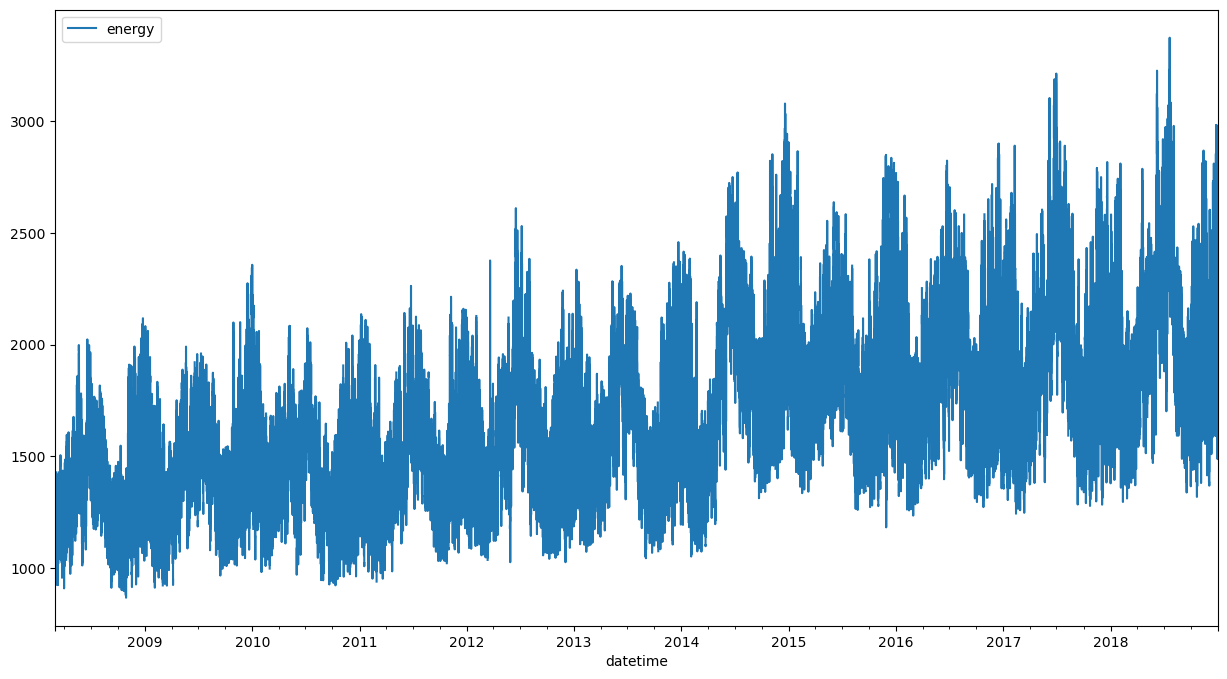

In [84]:
#Plot the time series
df1.plot()
plt.show()

In [98]:
df1 = df1[df1.index>"31-10-2018 23:00"]
df1
# df1['energy'] = 1/df1['energy']
# df1
from scipy.stats import boxcox
bcx_target, lam = boxcox(df1["energy"])
df1['energy'] = bcx_target
#lam is the best lambda for the distribution

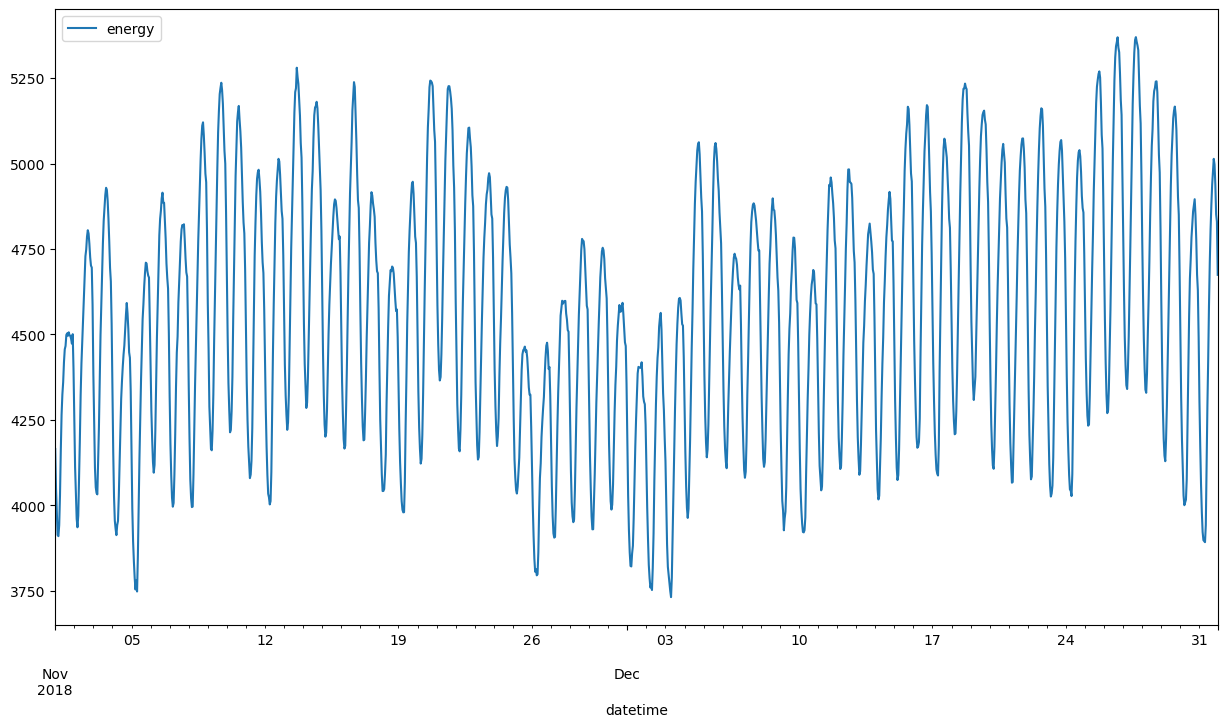

In [99]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
df1.plot()
plt.show()

In [100]:
df1.isnull().sum()

energy    0
dtype: int64

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1464 entries, 2018-11-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  1464 non-null   float64
dtypes: float64(1)
memory usage: 22.9 KB


In [102]:
df1=df1.interpolate()

We see an increasing trend and seasonality which is not constant in nature.

In [103]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1, model = 'additive', period = 12)   # 'period = 12' as we want monthly seasonality.

# Period of the series. Must be used if x is not a pandas object or if the index of x does not have  a frequency. Overrides
# default periodicity of x if x is a pandas object with a timeseries index.

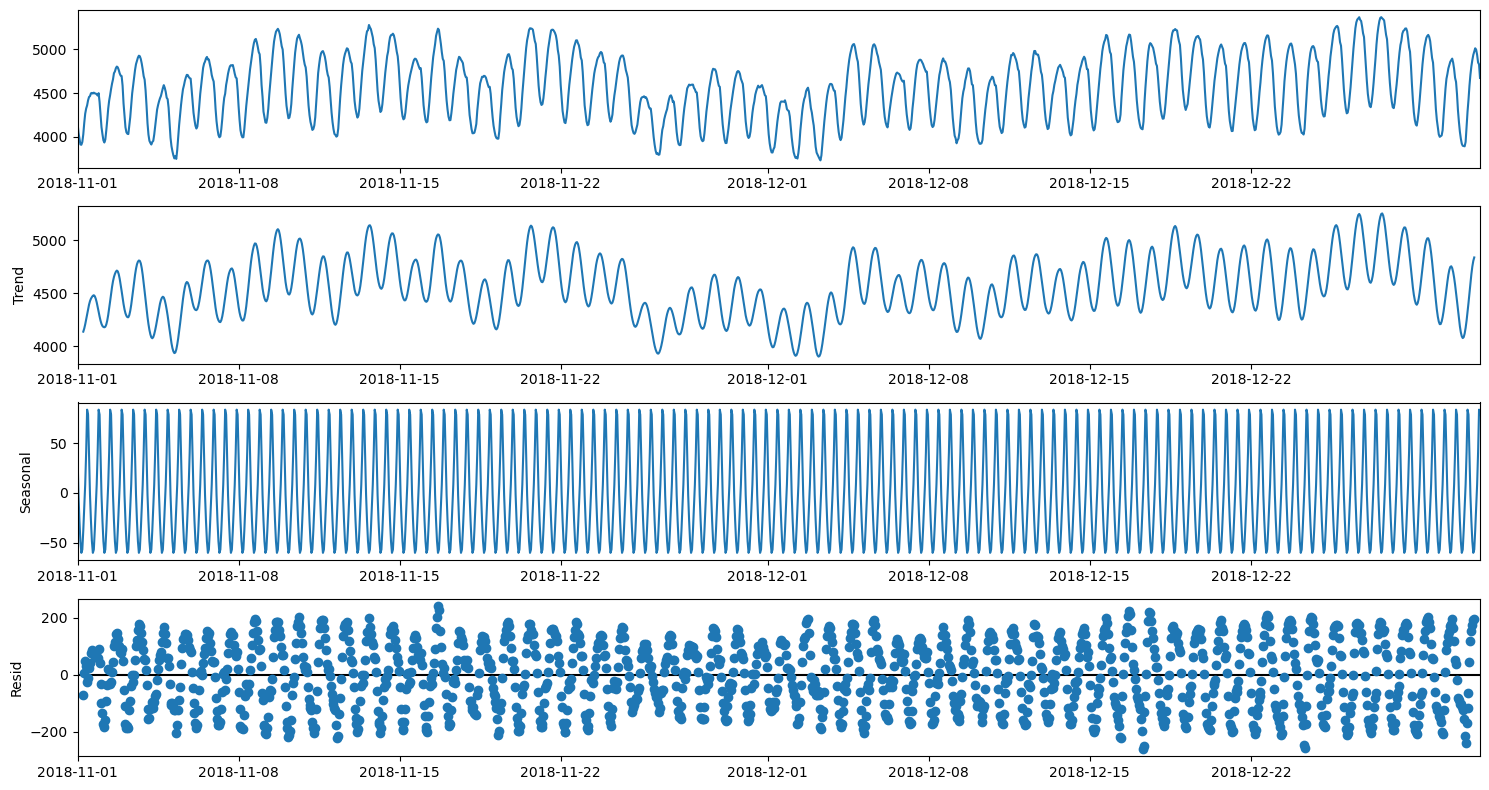

In [104]:
df1_add_decompose.plot()
plt.show()

As the error is similar to seasonality, the series is actually multiplicative, not additive.

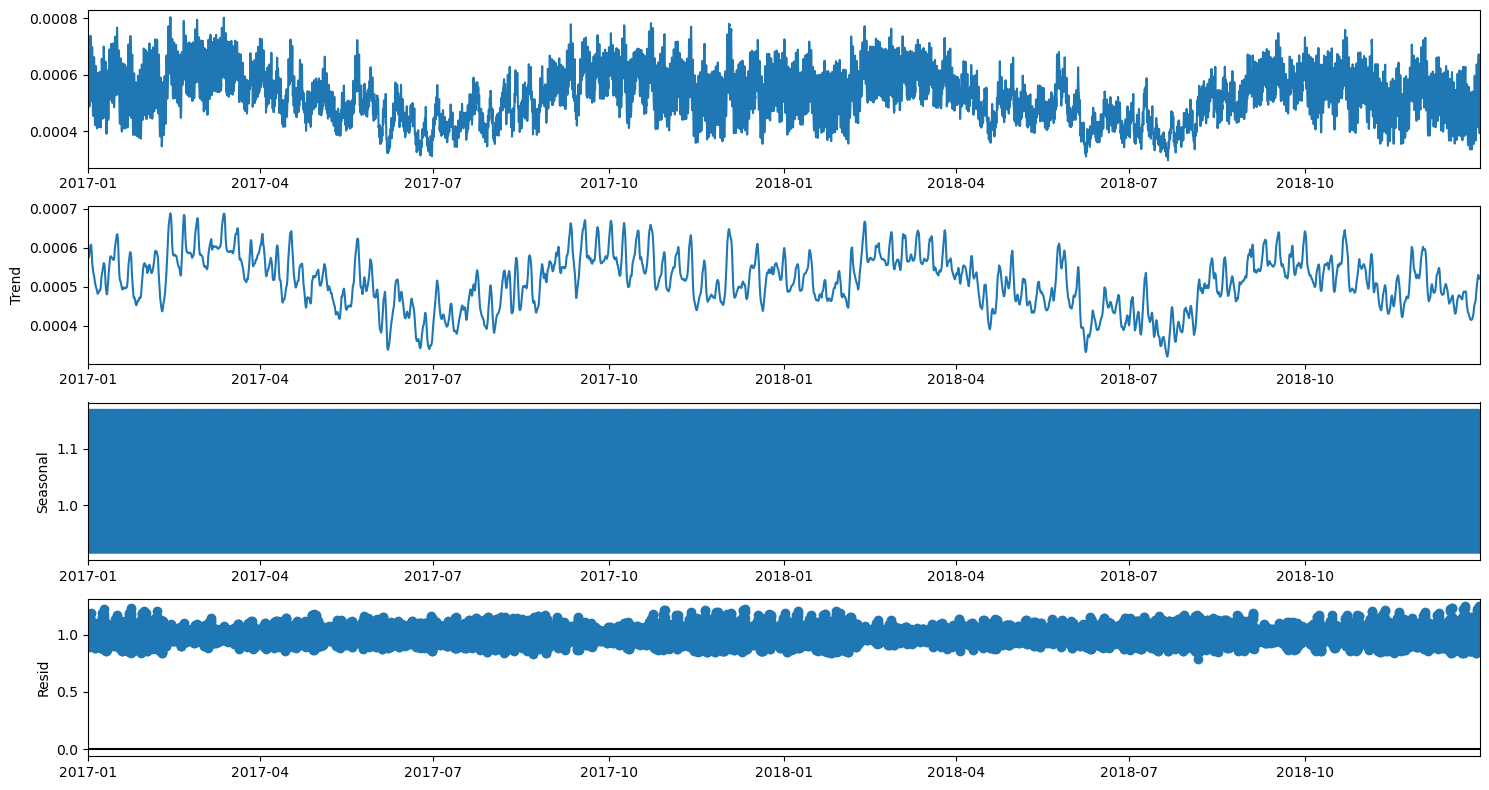

In [60]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

To convert multiplicative seasonality into additive seasonality, we take a log transformation.

In [19]:
#Let's try to do log transformation
df1_log = df1.copy()

In [20]:
df1_log['energy'] = np.log(df1)

In [21]:
df1_log.energy

datetime
2017-01-01 00:00:00    7.461962
2017-01-01 01:00:00    7.389087
2017-01-01 02:00:00    7.336109
2017-01-01 03:00:00    7.299992
2017-01-01 04:00:00    7.281127
                         ...   
2018-12-31 19:00:00    7.835360
2018-12-31 20:00:00    7.808682
2018-12-31 21:00:00    7.768954
2018-12-31 22:00:00    7.759163
2018-12-31 23:00:00    7.687180
Name: energy, Length: 17520, dtype: float64

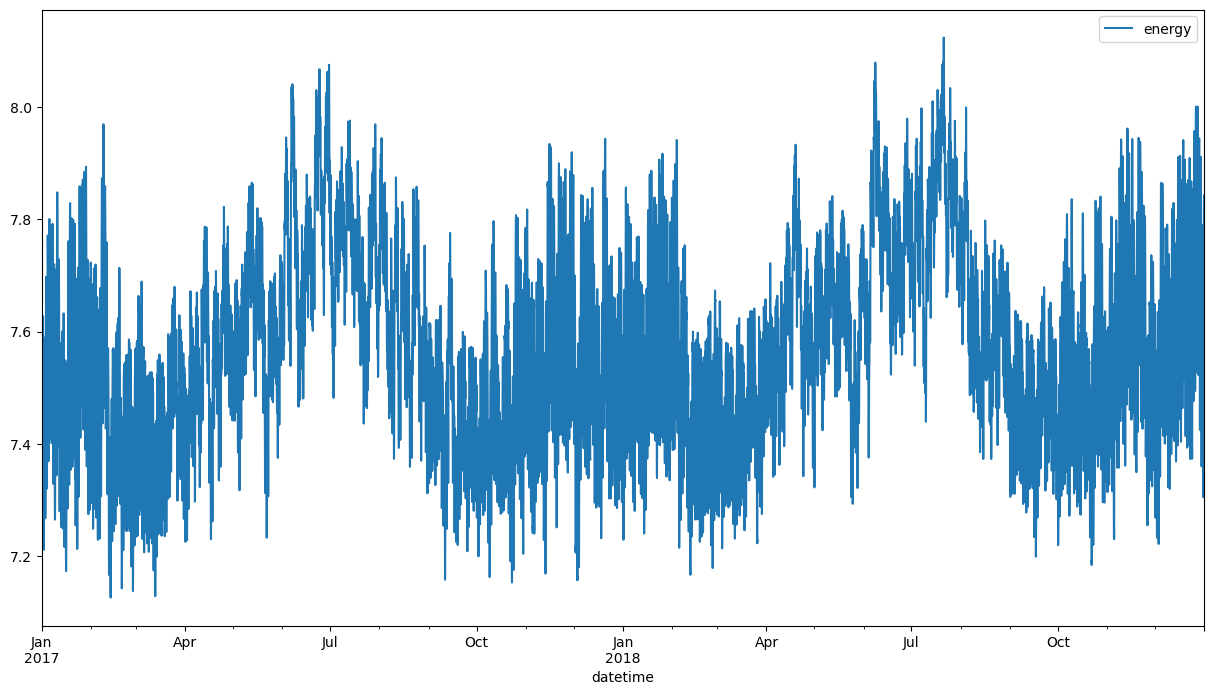

In [22]:
#Visualize the log transformed series
df1_log.plot()
plt.show()

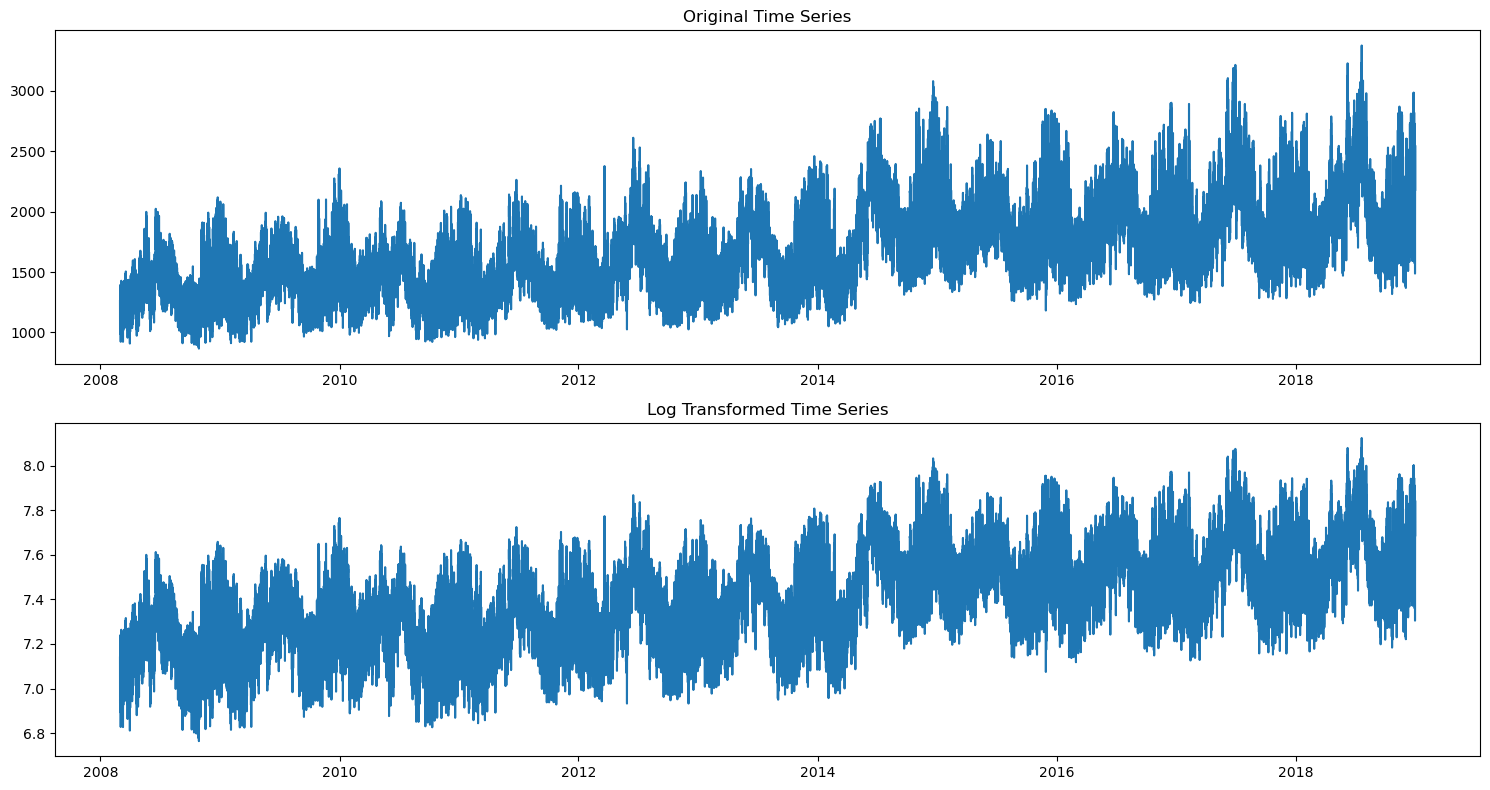

In [32]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()

## Example 2

In [33]:
#Read the data
df2 = pd.read_csv('train_IxoE5JN.csv', parse_dates = ['datetime'], index_col = 'datetime')

In [34]:
df2.head()

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500
2008-03-01 02:00:00,3,1056.247500
2008-03-01 03:00:00,4,1034.742000
2008-03-01 04:00:00,5,1026.334500


In [35]:
df2.drop("row_id",inplace=True,axis=1)
df2 = df2.interpolate()

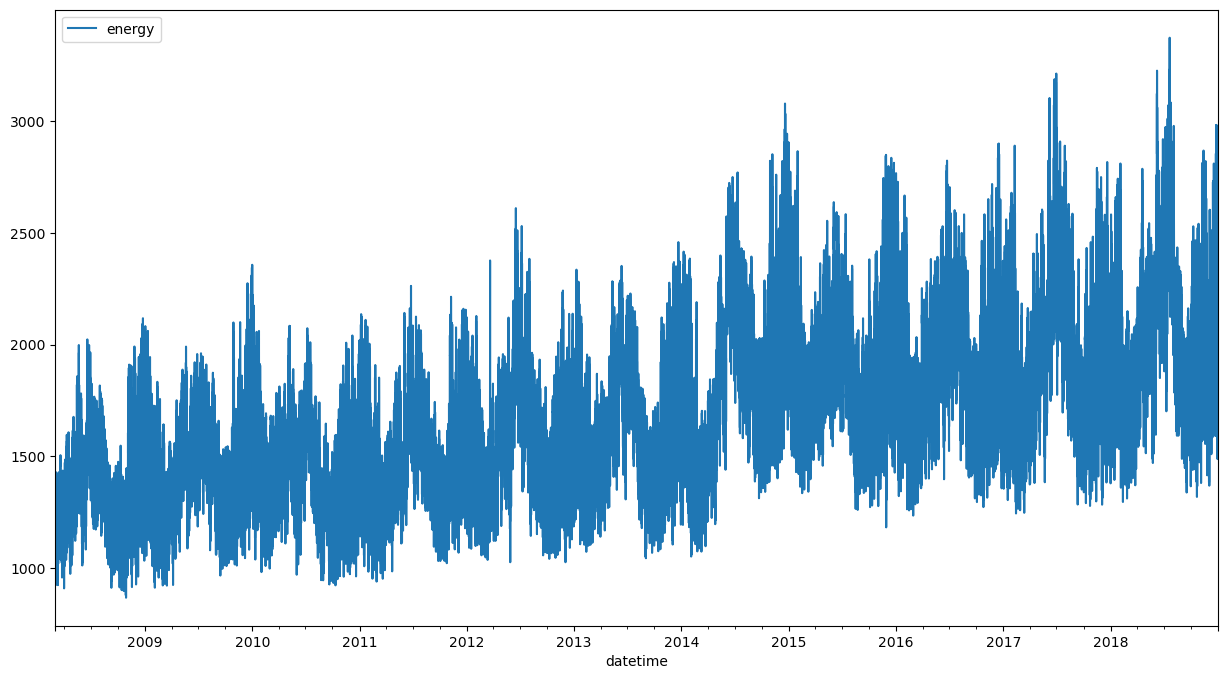

In [36]:
#Visualise the time series
df2.plot()
plt.show()

Doesn't show very clear trend and seasonality.

In [37]:
#Additive decomposition
df2_add_decompose = seasonal_decompose(df2, model = 'additive')

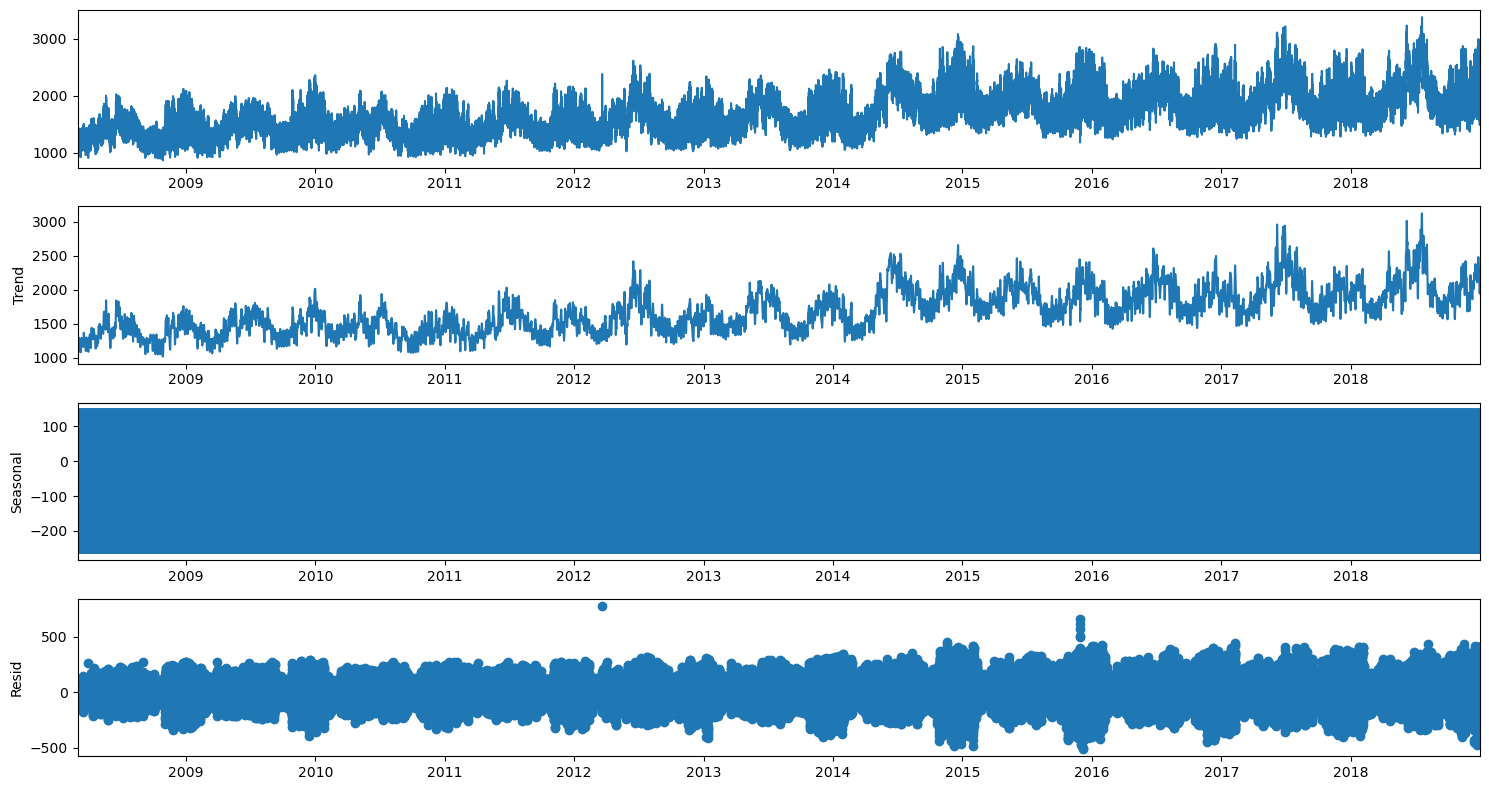

In [38]:
df2_add_decompose.plot()
plt.show()

As the errors are random, the series can be decomposed as additive model.

In [42]:
#Let's inspect each component 
df2_add_decompose.trend[0:40]
# out of scope: symmetric moving average decomposition of statsmodel leaves few values at the start and end as NAN(for trend and
# error).

datetime
2008-03-01 00:00:00            NaN
2008-03-01 01:00:00            NaN
2008-03-01 02:00:00            NaN
2008-03-01 03:00:00            NaN
2008-03-01 04:00:00            NaN
2008-03-01 05:00:00            NaN
2008-03-01 06:00:00            NaN
2008-03-01 07:00:00            NaN
2008-03-01 08:00:00            NaN
2008-03-01 09:00:00            NaN
2008-03-01 10:00:00            NaN
2008-03-01 11:00:00            NaN
2008-03-01 12:00:00    1261.995480
2008-03-01 13:00:00    1259.766156
2008-03-01 14:00:00    1259.061844
2008-03-01 15:00:00    1257.950062
2008-03-01 16:00:00    1256.548813
2008-03-01 17:00:00    1254.780656
2008-03-01 18:00:00    1252.037156
2008-03-01 19:00:00    1246.920750
2008-03-01 20:00:00    1239.440656
2008-03-01 21:00:00    1232.084094
2008-03-01 22:00:00    1226.248625
2008-03-01 23:00:00    1221.517562
2008-03-02 00:00:00    1216.991156
2008-03-02 01:00:00    1212.118125
2008-03-02 02:00:00    1206.459656
2008-03-02 03:00:00    1199.634094
2008-03-02 

In [40]:
df2_add_decompose.seasonal

datetime
2008-03-01 00:00:00    -89.795762
2008-03-01 01:00:00   -174.208045
2008-03-01 02:00:00   -225.041552
2008-03-01 03:00:00   -252.338034
2008-03-01 04:00:00   -262.522960
                          ...    
2018-12-31 19:00:00    146.904605
2018-12-31 20:00:00    142.997918
2018-12-31 21:00:00    138.594349
2018-12-31 22:00:00    108.604627
2018-12-31 23:00:00     18.073618
Name: seasonal, Length: 94992, dtype: float64

In [44]:
df2_add_decompose.resid[0:40]

datetime
2008-03-01 00:00:00          NaN
2008-03-01 01:00:00          NaN
2008-03-01 02:00:00          NaN
2008-03-01 03:00:00          NaN
2008-03-01 04:00:00          NaN
2008-03-01 05:00:00          NaN
2008-03-01 06:00:00          NaN
2008-03-01 07:00:00          NaN
2008-03-01 08:00:00          NaN
2008-03-01 09:00:00          NaN
2008-03-01 10:00:00          NaN
2008-03-01 11:00:00          NaN
2008-03-01 12:00:00     0.062163
2008-03-01 13:00:00    -2.467862
2008-03-01 14:00:00    15.648011
2008-03-01 15:00:00    29.586593
2008-03-01 16:00:00    36.872418
2008-03-01 17:00:00    19.751969
2008-03-01 18:00:00   -27.478854
2008-03-01 19:00:00   -63.316355
2008-03-01 20:00:00   -36.265074
2008-03-01 21:00:00   -12.291943
2008-03-01 22:00:00   -21.778752
2008-03-01 23:00:00     5.338319
2008-03-02 00:00:00    36.314106
2008-03-02 01:00:00    47.099920
2008-03-02 02:00:00    51.553896
2008-03-02 03:00:00    57.355940
2008-03-02 04:00:00    59.688335
2008-03-02 05:00:00    48.554816
2

In [45]:
df2.head()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


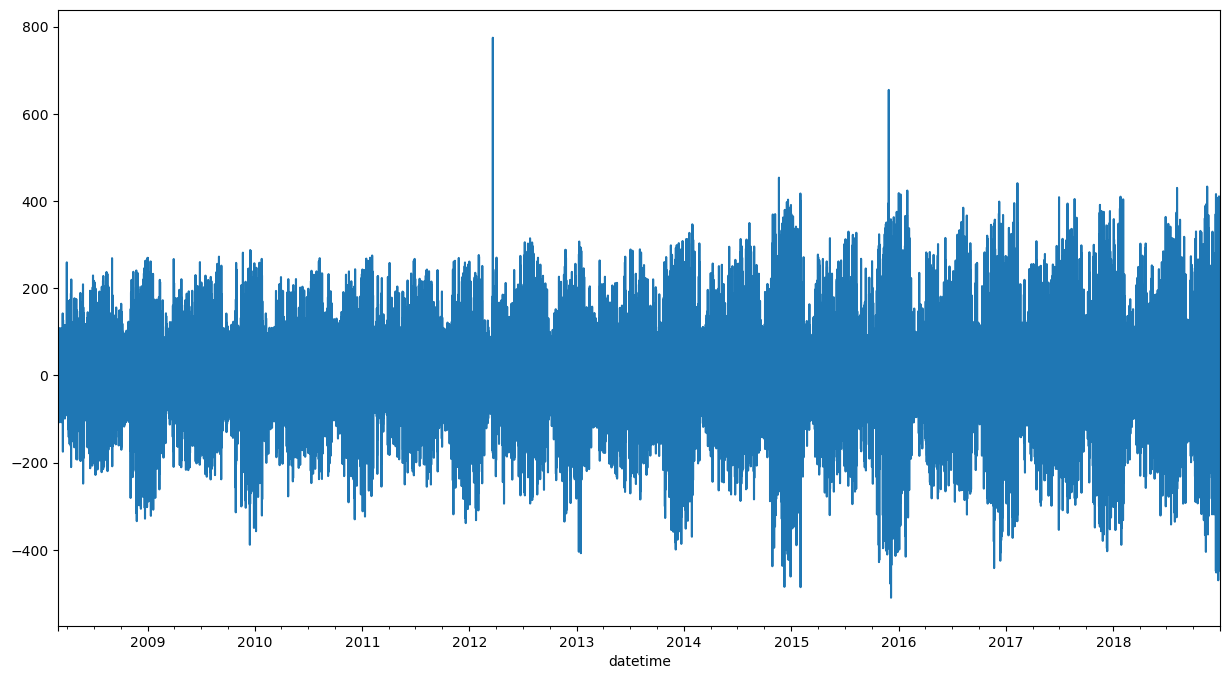

In [46]:
df2_add_decompose.resid.plot()
plt.show()

As the errors are random, the series can be decomposed as additive model.

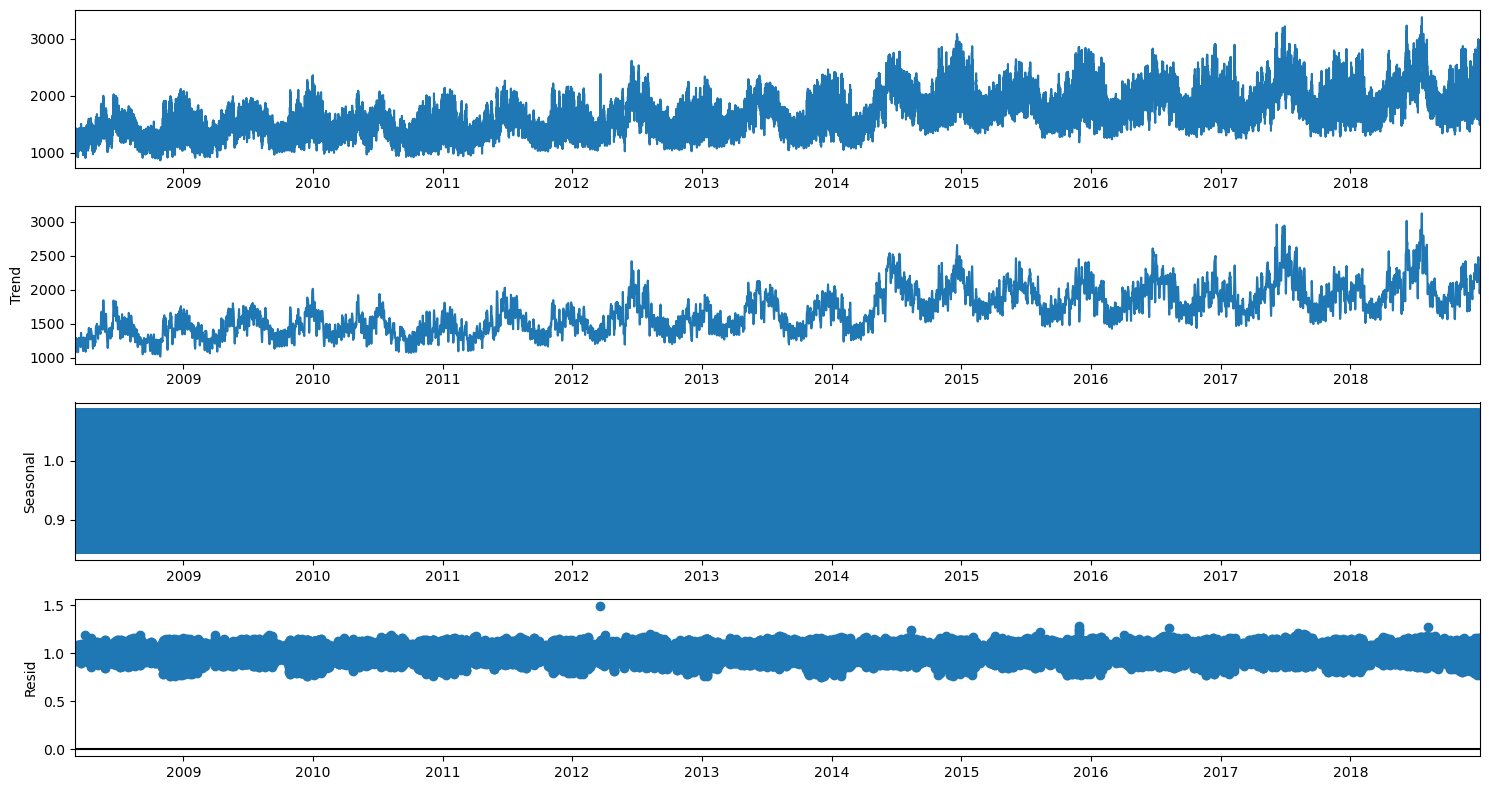

In [48]:
#Multiplicative decomposition
df2_mul_decompose = seasonal_decompose(df2, model = 'multiplicative')
df2_mul_decompose.plot()
plt.show()

As the errors are random, the series can be decomposed as multiplicative model.

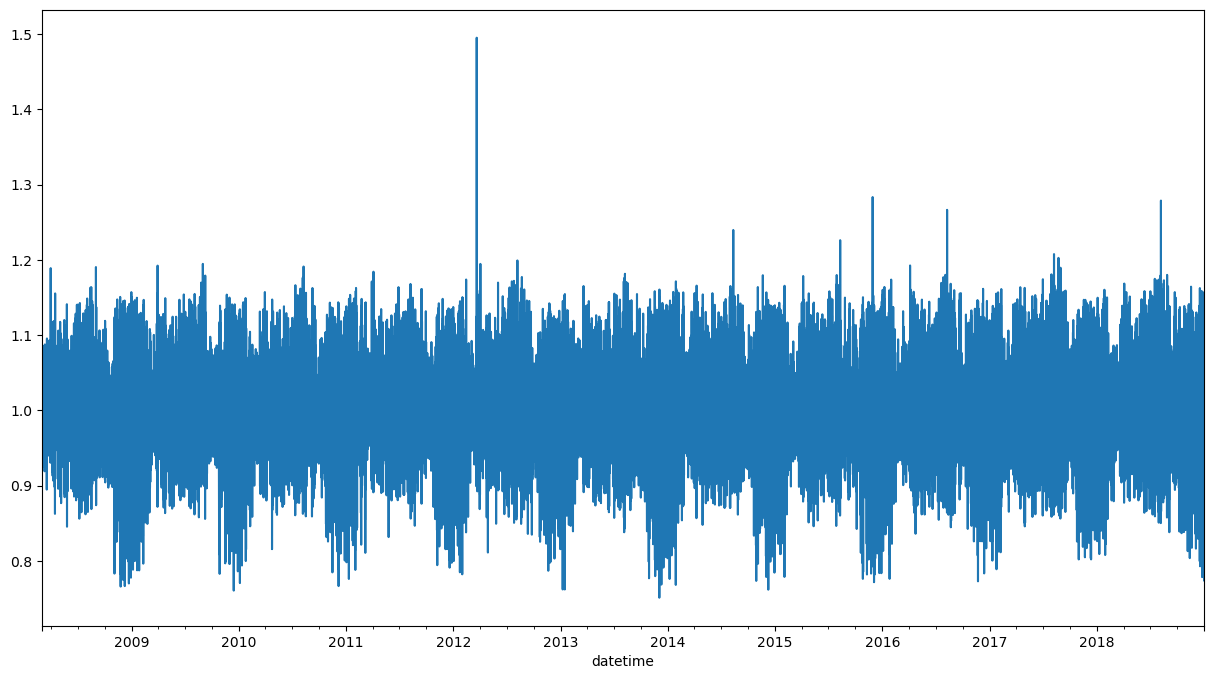

In [50]:
df2_mul_decompose.resid.plot()
plt.show()

No benefit in switching to multiplicative model, additive also had similar residuals.

In [52]:
#Let's inspect each component
df2_mul_decompose.trend[0:25]

datetime
2008-03-01 00:00:00            NaN
2008-03-01 01:00:00            NaN
2008-03-01 02:00:00            NaN
2008-03-01 03:00:00            NaN
2008-03-01 04:00:00            NaN
2008-03-01 05:00:00            NaN
2008-03-01 06:00:00            NaN
2008-03-01 07:00:00            NaN
2008-03-01 08:00:00            NaN
2008-03-01 09:00:00            NaN
2008-03-01 10:00:00            NaN
2008-03-01 11:00:00            NaN
2008-03-01 12:00:00    1261.995480
2008-03-01 13:00:00    1259.766156
2008-03-01 14:00:00    1259.061844
2008-03-01 15:00:00    1257.950062
2008-03-01 16:00:00    1256.548813
2008-03-01 17:00:00    1254.780656
2008-03-01 18:00:00    1252.037156
2008-03-01 19:00:00    1246.920750
2008-03-01 20:00:00    1239.440656
2008-03-01 21:00:00    1232.084094
2008-03-01 22:00:00    1226.248625
2008-03-01 23:00:00    1221.517562
2008-03-02 00:00:00    1216.991156
Name: trend, dtype: float64

In [53]:
df2_mul_decompose.seasonal

datetime
2008-03-01 00:00:00    0.947654
2008-03-01 01:00:00    0.897327
2008-03-01 02:00:00    0.867081
2008-03-01 03:00:00    0.850823
2008-03-01 04:00:00    0.844686
                         ...   
2018-12-31 19:00:00    1.085502
2018-12-31 20:00:00    1.083877
2018-12-31 21:00:00    1.082401
2018-12-31 22:00:00    1.065177
2018-12-31 23:00:00    1.011691
Name: seasonal, Length: 94992, dtype: float64

In [54]:
df2_mul_decompose.resid[0:25]

datetime
2008-03-01 00:00:00         NaN
2008-03-01 01:00:00         NaN
2008-03-01 02:00:00         NaN
2008-03-01 03:00:00         NaN
2008-03-01 04:00:00         NaN
2008-03-01 05:00:00         NaN
2008-03-01 06:00:00         NaN
2008-03-01 07:00:00         NaN
2008-03-01 08:00:00         NaN
2008-03-01 09:00:00         NaN
2008-03-01 10:00:00         NaN
2008-03-01 11:00:00         NaN
2008-03-01 12:00:00    1.018402
2008-03-01 13:00:00    1.017992
2008-03-01 14:00:00    1.032483
2008-03-01 15:00:00    1.042097
2008-03-01 16:00:00    1.046710
2008-03-01 17:00:00    1.035977
2008-03-01 18:00:00    1.006038
2008-03-01 19:00:00    0.982988
2008-03-01 20:00:00    1.002063
2008-03-01 21:00:00    1.018579
2008-03-01 22:00:00    1.005285
2008-03-01 23:00:00    1.007389
2008-03-02 00:00:00    1.008864
Name: resid, dtype: float64

## Downsampling

In [55]:
#Let's change the monthly series to quarterly. This would require aggregation. We do aggregation by mean.
df1_q = df1.resample('Q').mean()

<AxesSubplot:xlabel='datetime'>

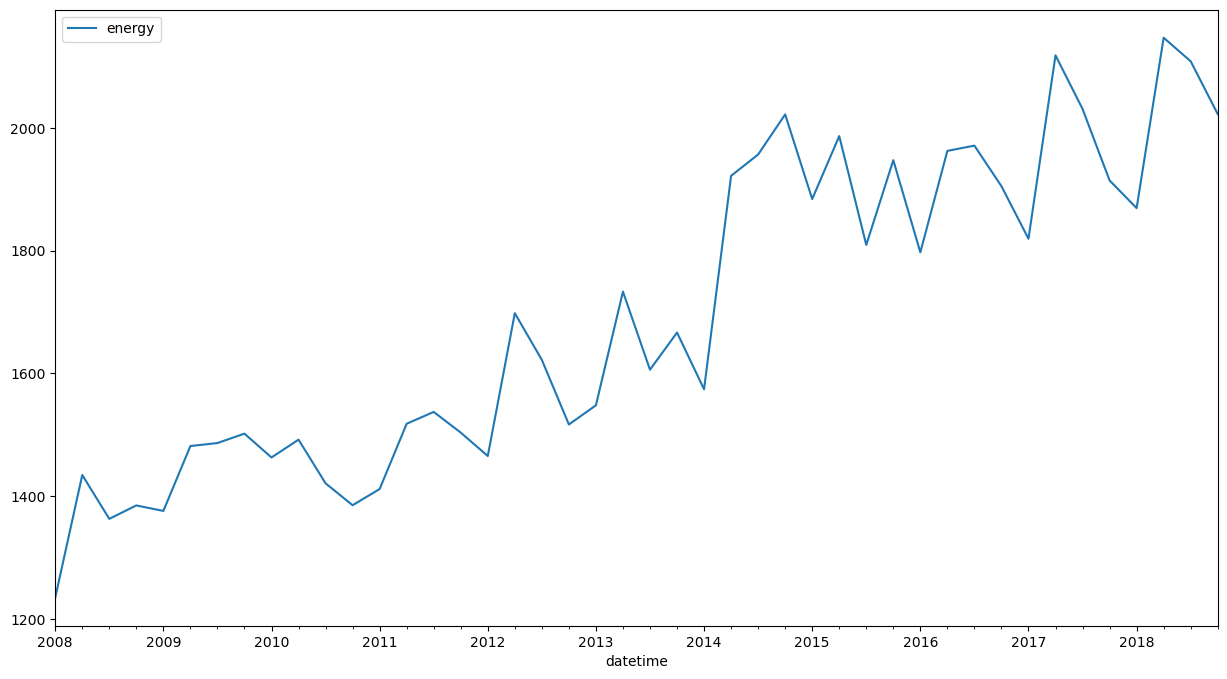

In [56]:
df1_q.plot()

## Upsampling 

In [57]:
# Let's change the monthly series to daily. We have data for 1st day of the month. We use 'ffill()', which fills the entire
# month with the value on first day of month.
df1_d = df1.resample('D').ffill()

In [59]:
df1_d

,energy
datetime,
2008-03-01,1259.985563
2008-03-02,1163.509500
2008-03-03,1077.222000
2008-03-04,1093.063500
2008-03-05,1186.342500
...,...
2018-12-27,2304.341600
2018-12-28,2284.154400
2018-12-29,2103.970000


<AxesSubplot:xlabel='datetime'>

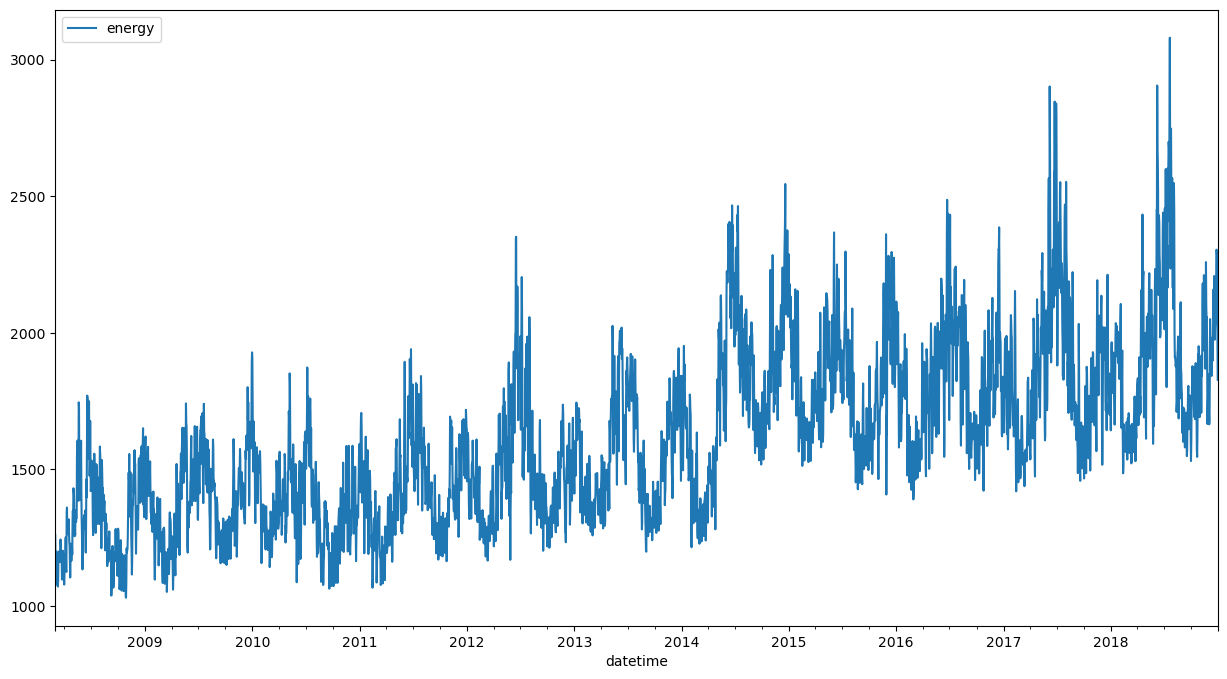

In [60]:
df1_d.plot()

In [61]:
# Let's change the monthly series to hourly. We will use '.interpolate()', which draws a line between two points to fill the gap
# in between.
df1_h = df1.resample('H').interpolate()

In [67]:
df1_h

,Pax
Year-Month,
1949-01-01 00:00:00,112.000000
1949-01-01 01:00:00,112.008065
1949-01-01 02:00:00,112.016129
1949-01-01 03:00:00,112.024194
1949-01-01 04:00:00,112.032258
...,...
1960-11-30 20:00:00,431.766667
1960-11-30 21:00:00,431.825000
1960-11-30 22:00:00,431.883333


<AxesSubplot:xlabel='Year-Month'>

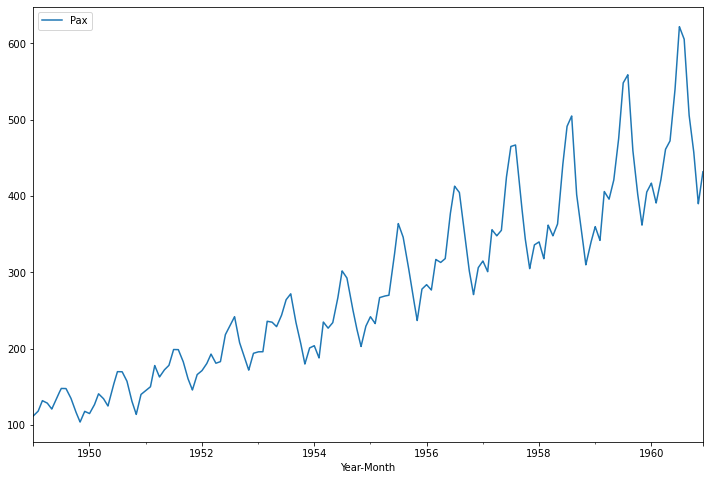

In [68]:
df1_h.plot()